Olympic Data Analysis

In [22]:
# Importing the necessary libraries in the environment
import numpy as np
import pandas as pd

In [26]:
# Loading the athlete_events dataset into the environment
athlete = pd.read_csv("athlete_events.csv")
# Displaying the first five rows of the dataframe
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
# Displaying the shape of the dataframe
print("The shape of the dataframe is:", athlete.shape)

The shape of the dataframe is: (271116, 15)


In [24]:
# Loading the noc_regions dataset into the environment
regions = pd.read_csv("noc_regions.csv")
# Displaying the first five rows of the dataframe
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [28]:
# Displaying the shape of the dataframe
print("The shape of the dataframe is:", regions.shape)

The shape of the dataframe is: (230, 3)


In [29]:
# Merging the two dataframes based on regions
merged_df = athlete.merge(regions, on='NOC',how='left')

In [31]:
# Displaying the first five rows of the merged dataframe
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [32]:
# Displaying the shape of the merged dataframe
merged_df.shape

(271116, 17)

In [36]:
# Displaying the unique regions in the dataframe
merged_df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

In [37]:
# Displaying the number of unique regions in the dataframe
print("The number of unique regions in the dataframe are:",merged_df['region'].unique().shape)

The number of unique regions in the dataframe are: (206,)


In [39]:
# Checking for duplicated records in the merged dataframe
merged_df.duplicated().sum()

np.int64(1385)

In [40]:
# Dropping the duplicate values from the merged dataframe
merged_df.drop_duplicates(inplace=True)

In [41]:
merged_df.duplicated().sum() # Checking is the duplicated records were handled

np.int64(0)

In [43]:
# Count of medals in each category (Gold, Silver, Bronze)
merged_df['Medal'].value_counts()

Medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64

In [44]:
# Performing one-hot encoding on the Medal column of the dataframe
pd.get_dummies(merged_df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
271111,False,False,False
271112,False,False,False
271113,False,False,False
271114,False,False,False


The rows where all three columns are false represents the NaN value

In [ ]:
# Concatinating the encoded columns with the merged dataframe
merged_df = pd.concat([merged_df,pd.get_dummies(merged_df['Medal'])],axis=1)

In [46]:
# Displaying the the dataframe after concatenation
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False


In [52]:
# Total Medal Count by Region/NOC
merged_df.groupby('NOC')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,677,739,651
4,ITA,575,531,531
...,...,...,...,...
225,LAO,0,0,0
226,AHO,0,1,0
227,LBR,0,0,0
228,LCA,0,0,0


The above output can be misleading because, in team events, medals are counted once per athlete rather than once per team, which inflates the total medal counts.

In [65]:
medal_tally = merged_df.drop_duplicates(subset=["Team","NOC","Games","Year","Season","City","Sport","Event","Medal"])

In [66]:
# Total Medal Count by Region/NOC
medal_tally=medal_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold',ascending=False).reset_index()
medal_tally

,region,Gold,Silver,Bronze
0,USA,1131,901,792
1,Russia,727,600,589
2,Germany,580,592,597
3,UK,289,321,312
4,France,265,287,334
...,...,...,...,...
200,Honduras,0,0,0
201,Guyana,0,0,1
202,Guinea-Bissau,0,0,0
203,Guinea,0,0,0


In [71]:
medal_tally["total"] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1131,901,792,2824
1,Russia,727,600,589,1916
2,Germany,580,592,597,1769
3,UK,289,321,312,922
4,France,265,287,334,886
...,...,...,...,...,...
200,Honduras,0,0,0,0
201,Guyana,0,0,1,1
202,Guinea-Bissau,0,0,0,0
203,Guinea,0,0,0,0


In [86]:
# Extracting the unique years from the dataframe
year = merged_df['Year'].unique().tolist()
year.sort()

In [88]:
# Extracting the unique years from the dataframe
year = merged_df['Year'].unique().tolist()
year.sort()
year.insert(0,"Overall")
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [98]:
# Extracting the unique regions from the dataframe
country = np.unique(merged_df['region'].dropna().values).tolist()
country.sort()
country.insert(0,"Overall")
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [100]:
# Extracting the unique season from the dataframe
season = np.unique(merged_df['Season'].dropna().values).tolist()
season.sort()
season.insert(0,"Overall")
season

['Overall', 'Summer', 'Winter']

In [101]:
medal_df = merged_df.drop_duplicates(subset=["Team","NOC","Games","Year","Season","City","Sport","Event","Medal"])

In [153]:
def fetch_medal_tally(year, country, season):

    medal_df = merged_df.drop_duplicates(
        subset=["Team","NOC","Games","Year","Season","City","Sport","Event","Medal"]
    )

    # Normalize year
    if year != 'Overall':
        year = int(year)

    # -------------------------------
    # APPLY FILTERS
    # -------------------------------
    temp_df = medal_df.copy()

    if year != 'Overall':
        temp_df = temp_df[temp_df['Year'] == year]

    if season != 'Overall':
        temp_df = temp_df[temp_df['Season'] == season]

    # -------------------------------
    # CASE 1: COUNTRY NOT SELECTED → RANKING
    # -------------------------------
    if country == 'Overall':

        result = (
            temp_df
            .groupby('region')[['Gold','Silver','Bronze']]
            .sum()
            .sort_values(['Gold','Silver','Bronze'], ascending=False)
            .reset_index()
        )

        result['total'] = result['Gold'] + result['Silver'] + result['Bronze']
        result['rank'] = range(1, len(result) + 1)

        return result

    # -------------------------------
    # CASE 2: COUNTRY SELECTED → YEAR-WISE TREND
    # -------------------------------
    else:
        temp_df = temp_df[temp_df['region'] == country]

        result = (
            temp_df
            .groupby('Year')[['Gold','Silver','Bronze']]
            .sum()
            .sort_index()
            .reset_index()
        )

        result['total'] = result['Gold'] + result['Silver'] + result['Bronze']
        return result


In [155]:
# Testing the function
fetch_medal_tally(year='1994', country='Russia',season='Overall')

,Year,Gold,Silver,Bronze,total
0,1994,11,8,4,23


Overall Analysis

In [163]:
# Displaying the first five rows of the dataframe
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False


In [160]:
# Unique years in the dataframe
merged_df["Year"].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])

In [ ]:
# No. of olympic editions (summer + winter)
print("The number of olympic editions are:",merged_df["Year"].unique().shape[0])

The number of olympic editions are: 35


In [168]:
# Cities that hosted the olympic games (summer + winter)
merged_df["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [176]:
# Cities that hosted the olympic games (summer + winter)
print("The number of olympic cities are:",merged_df["City"].unique().shape[0])

The number of olympic cities are: 42


In [ ]:
# No.Of sports in the olympic games
merged_df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [175]:
# No.Of events/ sports in the olympic games
print("The number of olympic sports are:",merged_df["Sport"].unique().shape[0])

The number of olympic sports are: 66


In [174]:
# No.Of events in the olympic games
print("The number of olympic events are:",merged_df["Event"].unique().shape[0])

The number of olympic events are: 765


In [ ]:
# No.Of athletes who have participated in the olympic games
print("The number of athletes paticipated at the olympic games:",merged_df["Name"].unique().shape[0])

The number of olympic events are: 134732


In [179]:
# No.Of participating nations in the olympic games
print("The number of participating nations at the olympic games:",merged_df["region"].unique().shape[0])

The number of participating nations at the olympic games: 206


In [180]:
# Participating nations over time
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False


In [191]:
# Participating countries per year
nations = merged_df.drop_duplicates(["Year","region"])["Year"].value_counts().reset_index().sort_values('Year')
nations

,Year,count
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
29,1912,29
30,1920,29
26,1924,46
27,1928,46
25,1932,47


In [194]:
nations = nations.rename(
    columns={"Year": "Edition", "count": "Participating Countries"}
)
nations

,Edition,Participating Countries
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
29,1912,29
30,1920,29
26,1924,46
27,1928,46
25,1932,47


In [189]:
import plotly.express as px

In [195]:
fig = px.line(
    nations,
    x="Edition",
    y="Participating Countries",
    markers=True
)
fig.show()

In [ ]:
# No. of events per olympic editions
events = merged_df.drop_duplicates(["Year","Event"])["Year"].value_counts().reset_index().sort_values('Year')
events

,Year,count
34,1896,43
27,1900,90
26,1904,95
31,1906,74
23,1908,109
24,1912,107
19,1920,158
20,1924,148
22,1928,136
21,1932,145


In [197]:
# No. of athletes per olympic editions
athletes = merged_df.drop_duplicates(["Year","Name"])["Year"].value_counts().reset_index().sort_values('Year')
athletes

,Year,count
34,1896,176
31,1900,1220
33,1904,650
32,1906,841
29,1908,2024
25,1912,2409
22,1920,2675
20,1924,3565
19,1928,3702
28,1932,2174


In [198]:
x =merged_df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

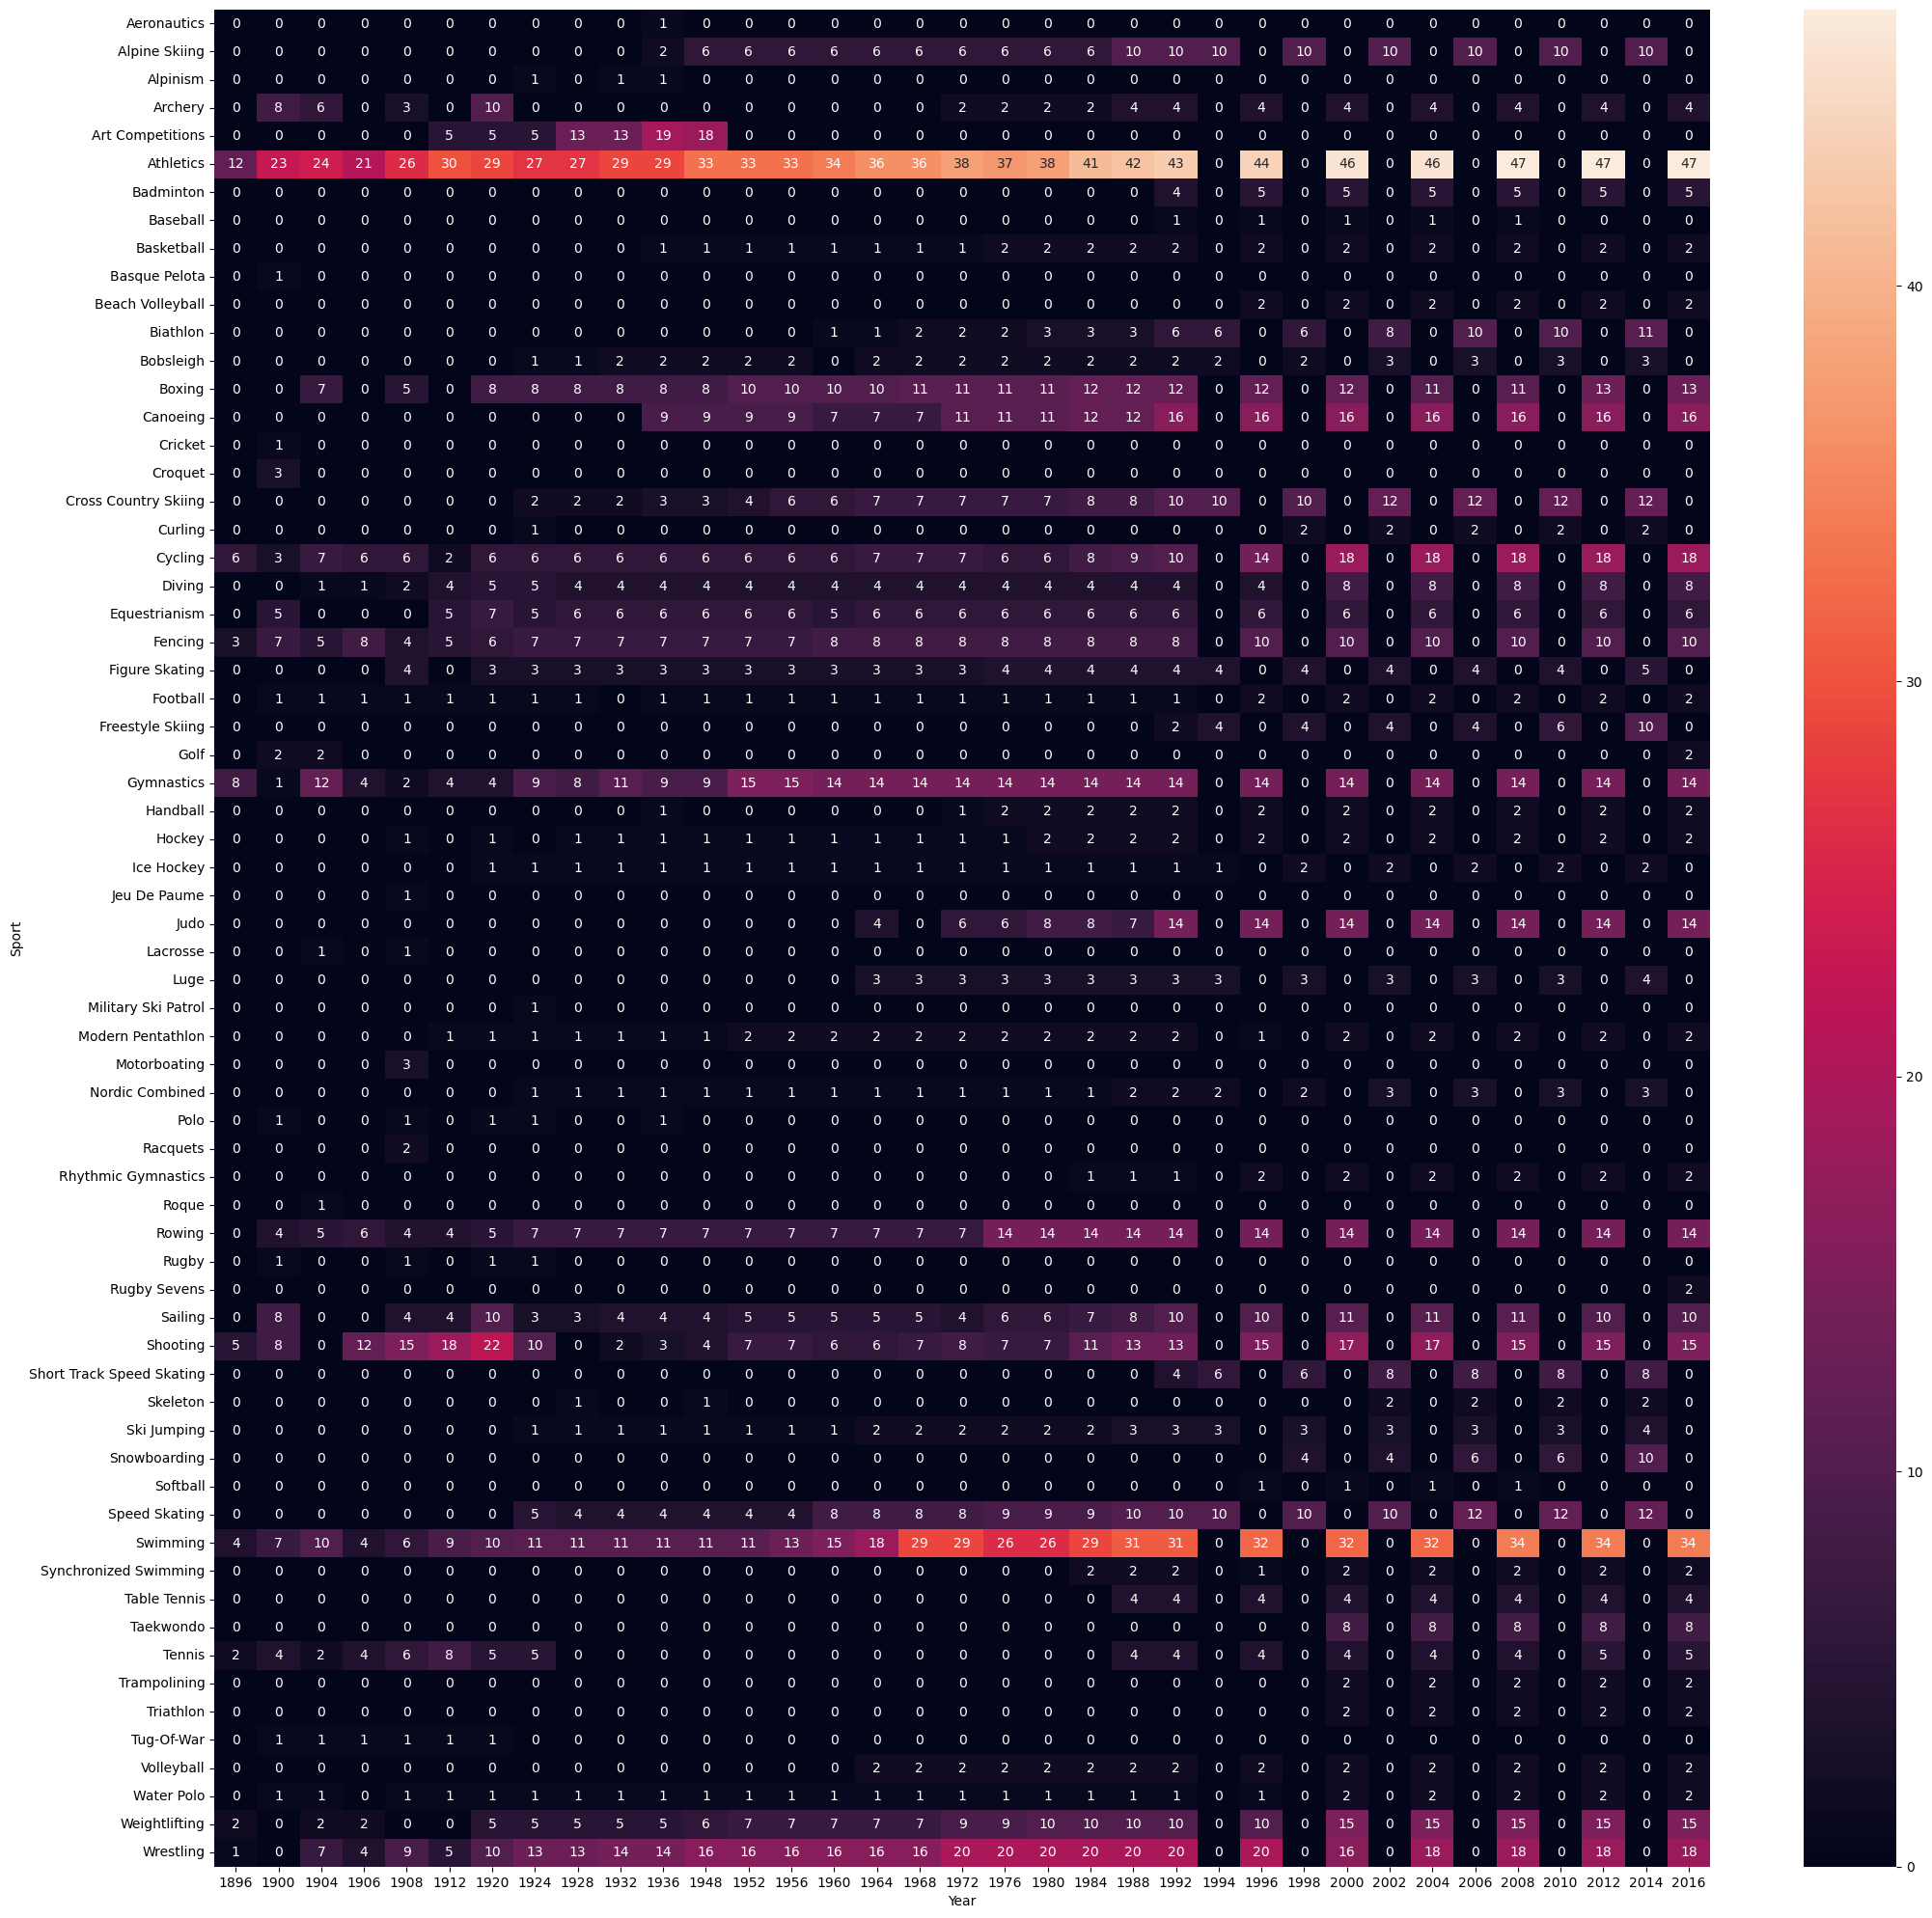

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year', values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [ ]:
def most_successful(merged_df, sport):

    temp_df = merged_df.dropna(subset=['Medal'])

    if sport != "Overall":
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Count medals per athlete
    top_athletes = (
        temp_df['Name']
        .value_counts()
        .reset_index(name='Medals')
        .rename(columns={'index': 'Name'})
        .head(15)
    )

    # Merge country and sport info
    top_athletes = top_athletes.merge(
        merged_df[['Name', 'region', 'Sport']],
        on='Name',
        how='left'
    )

    # Keep dominant sport per athlete
    top_athletes = (
        top_athletes
        .groupby(['Name', 'region', 'Medals'])['Sport']
        .agg(lambda x: x.value_counts().idxmax())
        .reset_index()
    )

    # SORT IN DESCENDING ORDER
    top_athletes = top_athletes.sort_values(
        by='Medals',
        ascending=False
    ).reset_index(drop=True)

    return top_athletes


In [227]:
top_athletes = most_successful(merged_df, "Figure Skating")
top_athletes

,Name,region,Medals,Sport
0,Gillis Emanuel Grafstrm,Sweden,4,Figure Skating
1,Yevgeny Viktorovich Plyushchenko,Russia,4,Figure Skating
2,Andre Marguerite Blanche Brunet-Joly,France,3,Figure Skating
3,Artur Valeryevich Dmitriyev,Russia,3,Figure Skating
4,"Charles Allen ""Charlie"" White, Jr.",USA,3,Figure Skating
5,"Irina Konstantinovna Rodnina (-Zaytseva, -Mink...",Russia,3,Figure Skating
6,Marina Vladimirovna Klimova (-Ponomarenko),Russia,3,Figure Skating
7,Meryl Elizabeth Davis,USA,3,Figure Skating
8,Pierre mile Ernest Brunet,France,3,Figure Skating
9,Scott Patrick Moir,Canada,3,Figure Skating


Country-wise Analysis

In [229]:
# Country-wise medal tally per year
temp_df = medal_df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
temp_df

C:\Users\ICG312\AppData\Local\Temp\ipykernel_20924\793604085.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,True,False,False
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,True,False,False
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,True,False,False
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,False,False,True
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,True,False,False
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,False,True,False
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True


In [237]:
new_df = temp_df[temp_df["region"]=='India']
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

In [238]:
# Plotting a line plot
fig = px.line(
    final_df,
    x="Year",
    y="Medal",
    markers=True
)
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

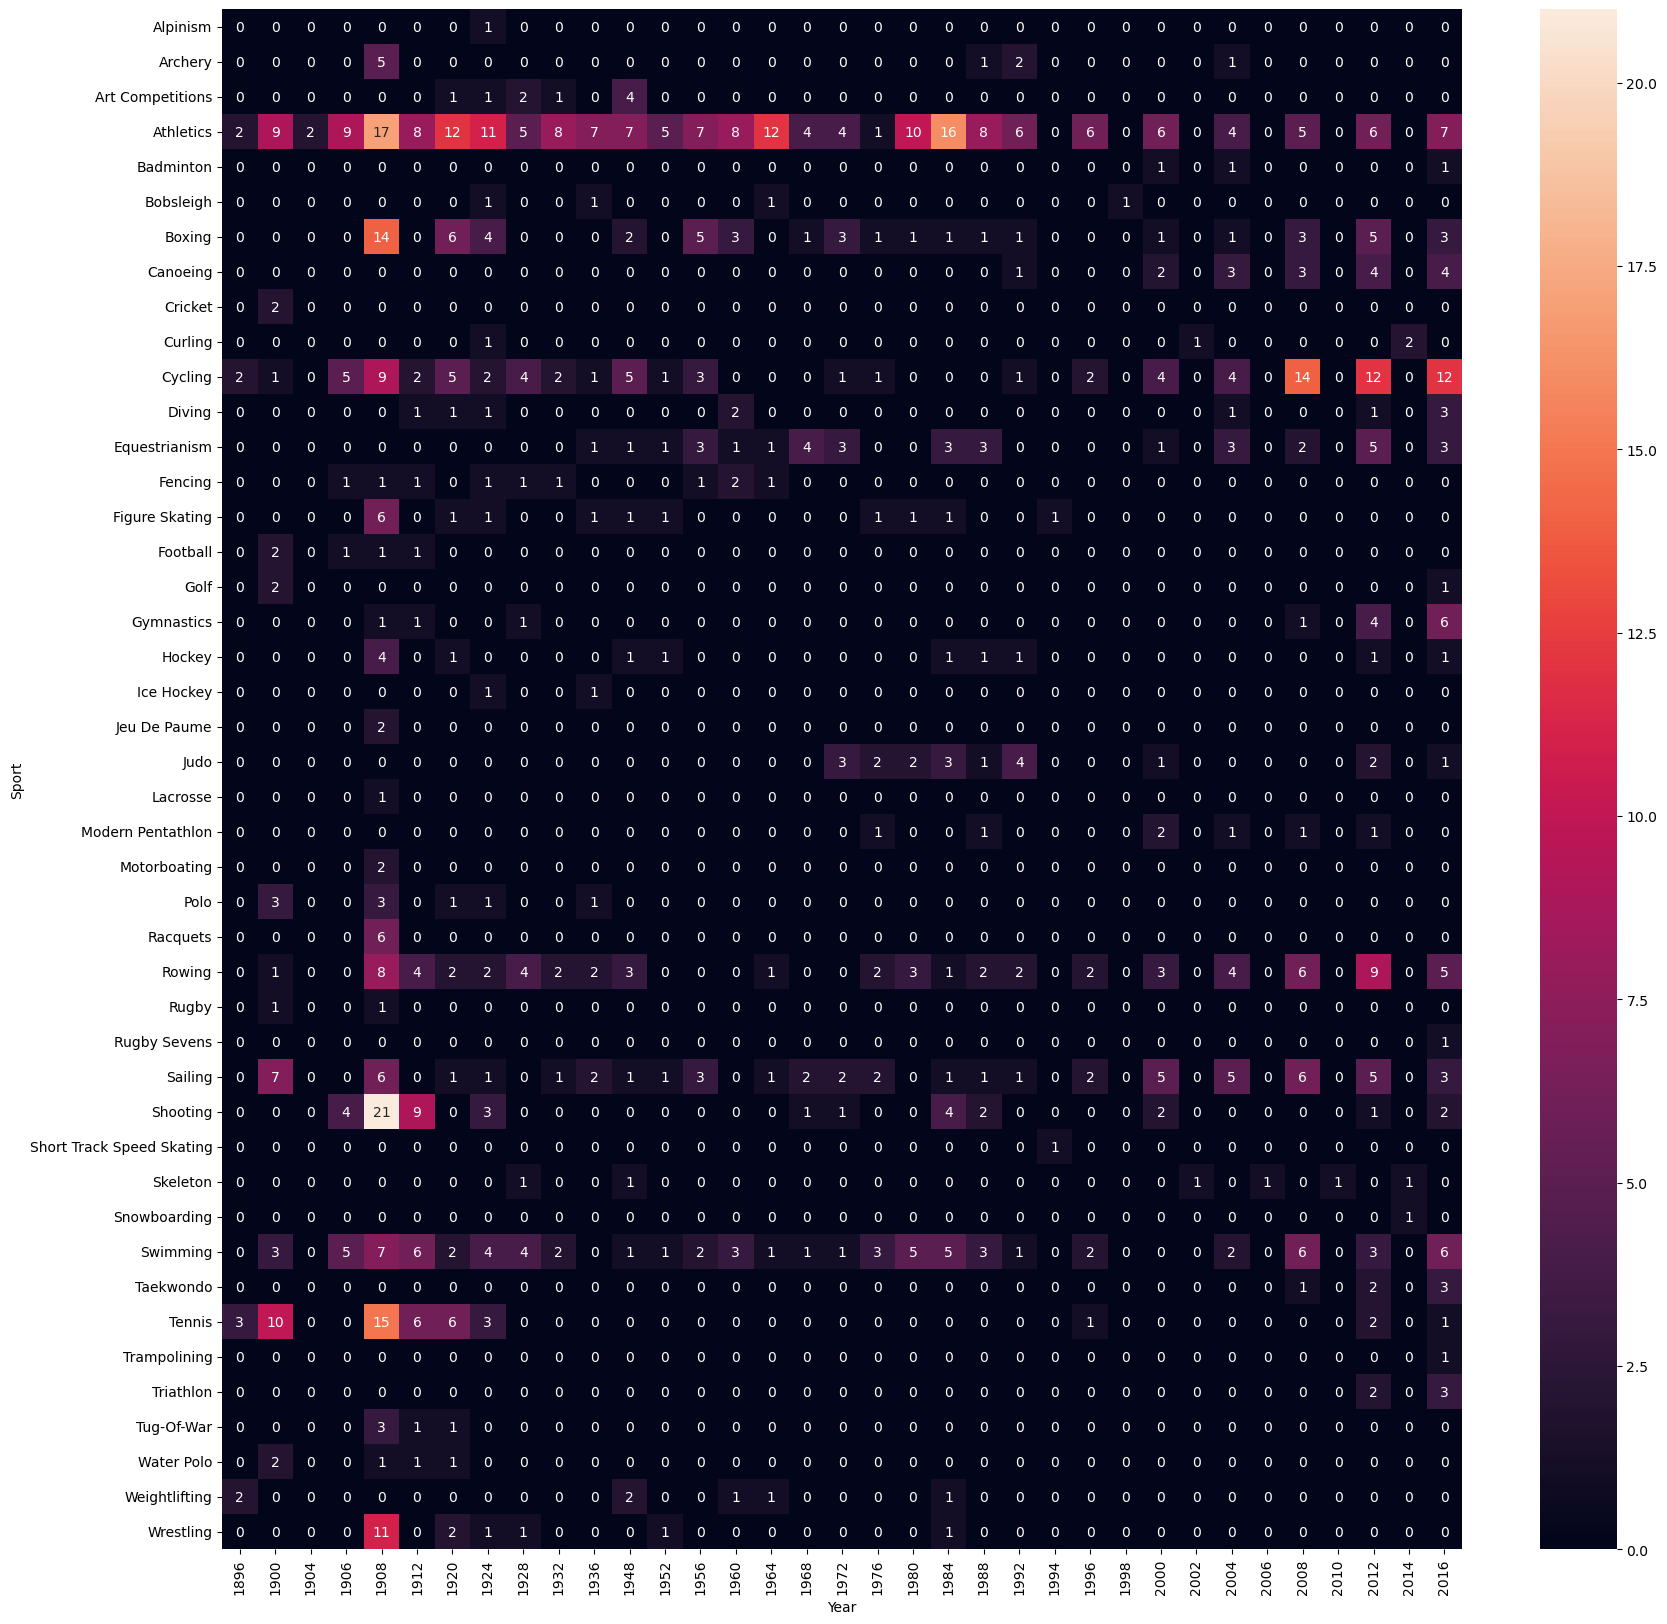

In [245]:
new_df = temp_df[temp_df["region"]=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [248]:
def most_successful(merged_df, country):

    temp_df = merged_df.dropna(subset=['Medal'])

   
    temp_df = temp_df[temp_df['region'] == country]

    # Count medals per athlete
    top_athletes = (
        temp_df['Name']
        .value_counts()
        .reset_index(name='Medals')
        .rename(columns={'index': 'Name'})
        .head(15)
    )

    # Merge country and sport info
    top_athletes = top_athletes.merge(
        merged_df[['Name', 'region', 'Sport']],
        on='Name',
        how='left'
    )

    # Keep dominant sport per athlete
    top_athletes = (
        top_athletes
        .groupby(['Name', 'Medals'])['Sport']
        .agg(lambda x: x.value_counts().idxmax())
        .reset_index()
    )

    # SORT IN DESCENDING ORDER
    top_athletes = top_athletes.sort_values(
        by='Medals',
        ascending=False
    ).reset_index(drop=True)

    return top_athletes


In [250]:
most_successful(merged_df, 'UK')

,Name,Medals,Sport
0,Bradley Marc Wiggins,8,Cycling
1,Henry Taylor,8,Swimming
2,"Christopher Andrew ""Chris"" Hoy",7,Cycling
3,Jason Francis Kenny,7,Cycling
4,John Arthur Jarvis,6,Swimming
5,"Stephen Geoffrey ""Steven"" Redgrave",6,Rowing
6,"Charles Benedict ""Ben"" Ainslie",5,Sailing
7,Jack Beresford,5,Rowing
8,Katherine Jane Grainger,5,Rowing
9,"Kathleen ""Kitty"" McKane (-Godfree)",5,Tennis


Athlete-wise Analysis

In [251]:
import plotly.figure_factory as ff

In [252]:
athlete_df = merged_df.drop_duplicates(subset=['Name','region'])

In [258]:
x1 = athlete_df['Age'].dropna()
x2 =athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 =athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 =athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [259]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [260]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [262]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport']== sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [263]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)

In [264]:
fig.show()

In [265]:
# Height vs weight
athlete_df['Medal'].fillna('No Medal',inplace=True)

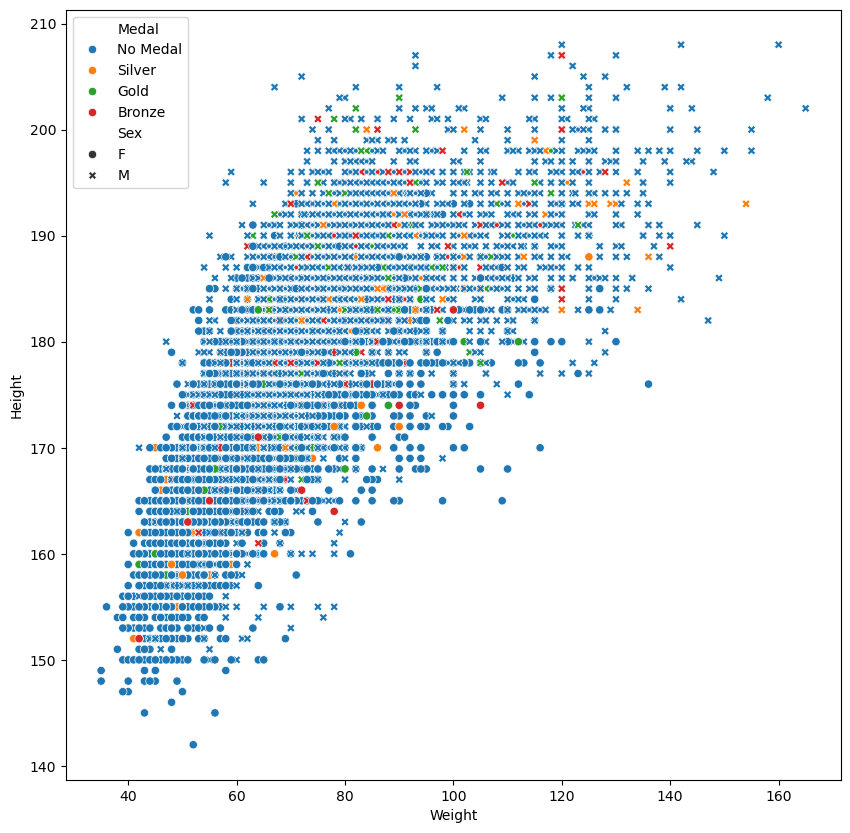

In [271]:
plt.figure(figsize=(10, 10))
temp_df = athlete_df[athlete_df['Sport']== 'Athletics']
sns.scatterplot(
    x='Weight',
    y='Height',
    data=temp_df,
    hue=temp_df['Medal'],
    style=temp_df['Sex']
)
plt.show()


In [ ]:
# Men vs Women participation
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()[].reset_index()

In [282]:
final = men.merge(women, on='Year')
final.rename(columns={"Name_x": "Men","Name_y": "Women"},inplace=True)
final

,Year,Men,Women
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1772,44
4,1912,1977,53
5,1920,2278,73
6,1924,2807,140
7,1928,2706,305
8,1932,1560,177
9,1936,4027,387


In [281]:
fig = px.line(final, x="Year", y=["Men","Women"])
fig.show()